In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df2 = pd.read_csv("student_scores.csv")

In [15]:
df = pd.read_csv("student_scores2.csv")

In [16]:
print(df2.head)

<bound method NDFrame.head of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female     group B   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         995    male     group C    some high school      standard   
30637         996    male     group E  associate's degree  free/reduced   
30638         997    male     group C        some college      standard   
30639         998    male     group A    some high school  free/reduced   
30640         999  female     group D  associate's degree      standard   

        TestPrep  MathScore  ReadingScore  WritingScore  
0          

In [17]:
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSi

In [18]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  

In [19]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  Nr

In [20]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [21]:
df=df.drop("Unnamed: 0",axis=1)

In [22]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


gender distribution

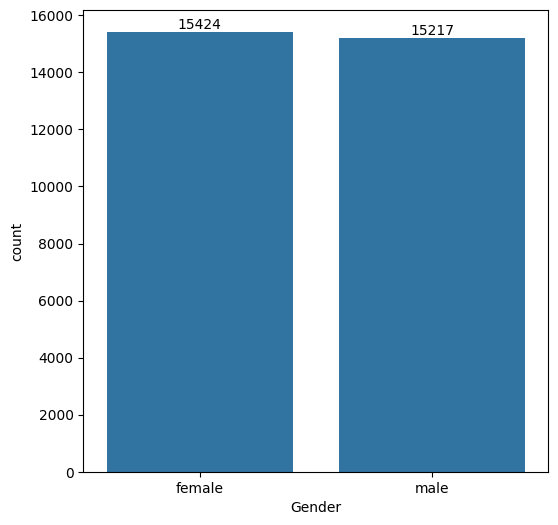

In [25]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.show()


# i have analysed that both female and male is almost the same

In [26]:
gb = df.groupby("ParentEduc").agg({"MathScore": 'mean',"ReadingScore": 'mean',"WritingScore": 'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


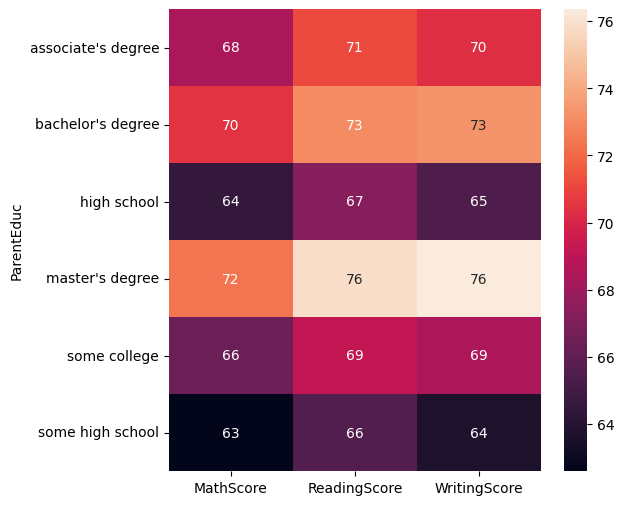

In [30]:
plt.figure(figsize=(6,6))
sns.heatmap(gb, annot = True)
plt.show()

# from the graph we can conculade that higher educated parents helps student to get good marks

In [31]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean',"ReadingScore": 'mean',"WritingScore": 'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


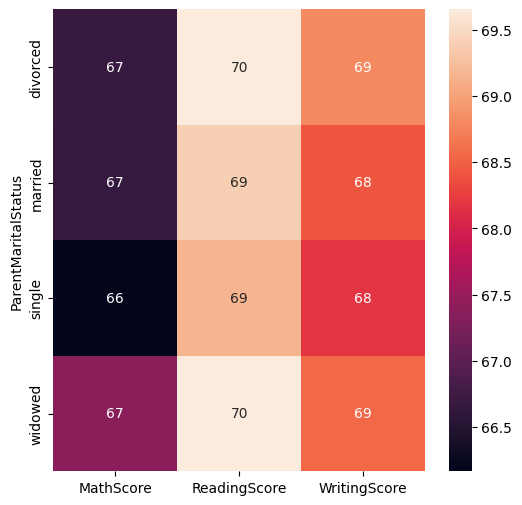

In [32]:
plt.figure(figsize=(6,6))
sns.heatmap(gb1, annot = True)
plt.show()

# no effect in student marks in their parent"s realtionship

In [34]:
gb2 = df.groupby("PracticeSport").agg({"MathScore": 'mean',"ReadingScore": 'mean',"WritingScore": 'mean'})
print(gb2)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


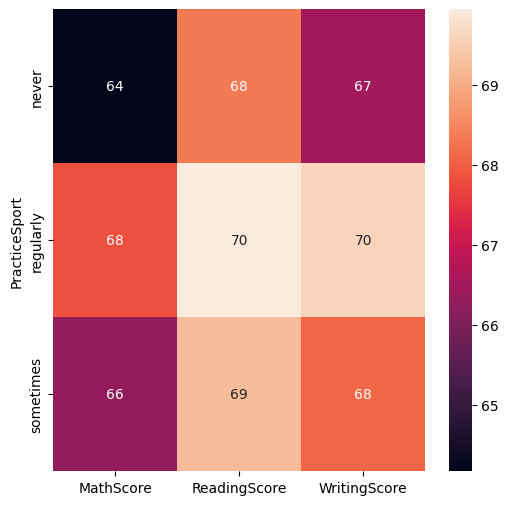

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(gb2, annot = True)
plt.show()

from the graph we can say that pratice sport not much effect th marks but regural can increase the marks bas it make student fresh

In [37]:
gb3 = df.groupby("IsFirstChild").agg({"MathScore": 'mean',"ReadingScore": 'mean',"WritingScore": 'mean'})
print(gb3)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


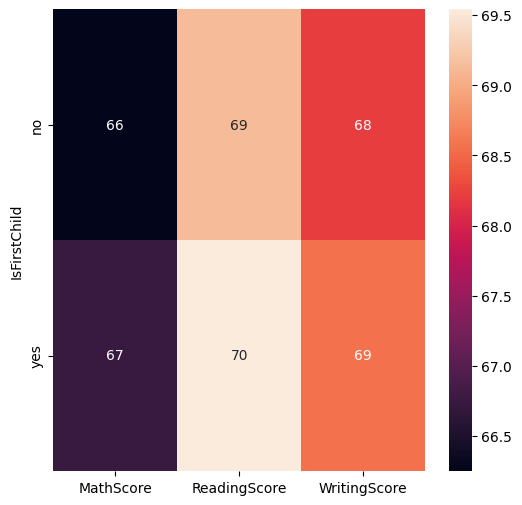

In [39]:
plt.figure(figsize=(6,6))
sns.heatmap(gb3, annot = True)
plt.show()

no effect regarding child is elder or not

In [40]:
gb4 = df.groupby("NrSiblings").agg({"MathScore": 'mean',"ReadingScore": 'mean',"WritingScore": 'mean'})
print(gb4)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


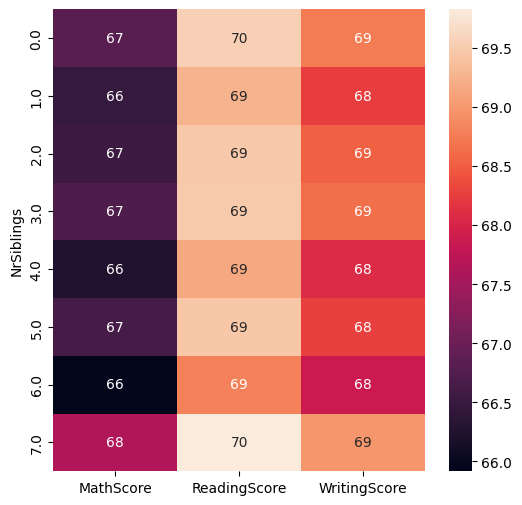

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(gb4, annot = True)
plt.show()

no effect regarding child has brother or not

In [42]:
gb5 = df.groupby("TransportMeans").agg({"MathScore": 'mean',"ReadingScore": 'mean',"WritingScore": 'mean'})
print(gb5)


                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


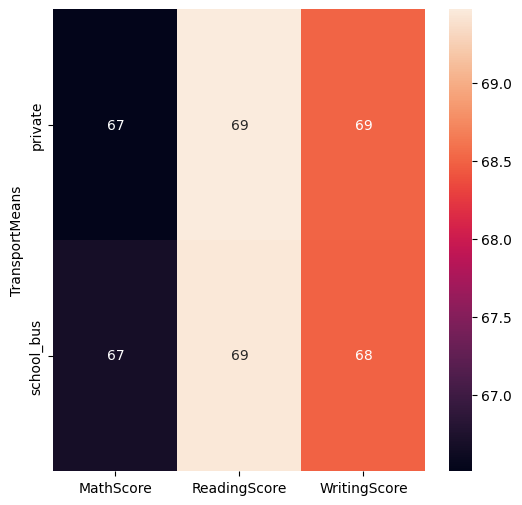

In [43]:
plt.figure(figsize=(6,6))
sns.heatmap(gb5, annot = True)
plt.show()

no change in marks difference of student using private and school bus

In [44]:
gb6 = df.groupby("WklyStudyHours").agg({"MathScore": 'mean',"ReadingScore": 'mean',"WritingScore": 'mean'})
print(gb6)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


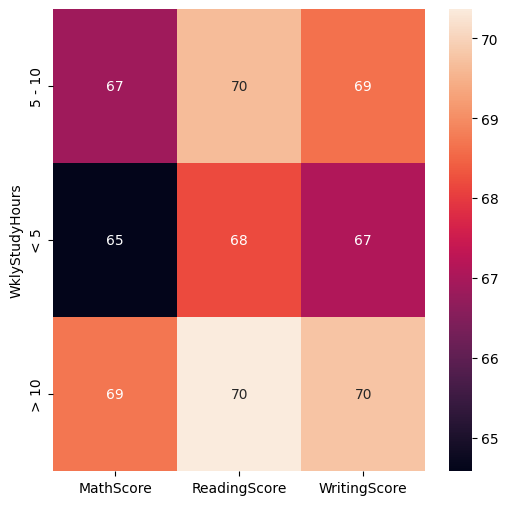

In [45]:
plt.figure(figsize=(6,6))
sns.heatmap(gb6, annot = True)
plt.show()

#their is a sharp rise of marks in weekly hours study by a student

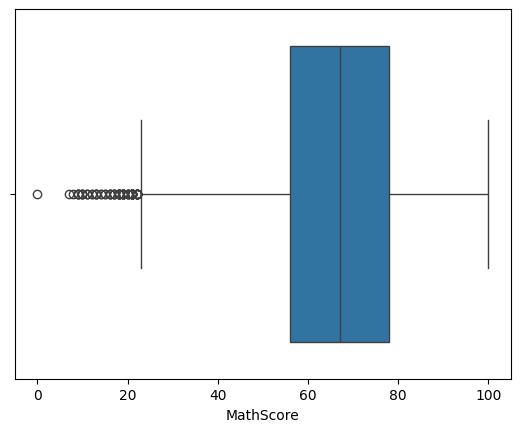

In [46]:
sns.boxplot(data= df , x = "MathScore")
plt.show()

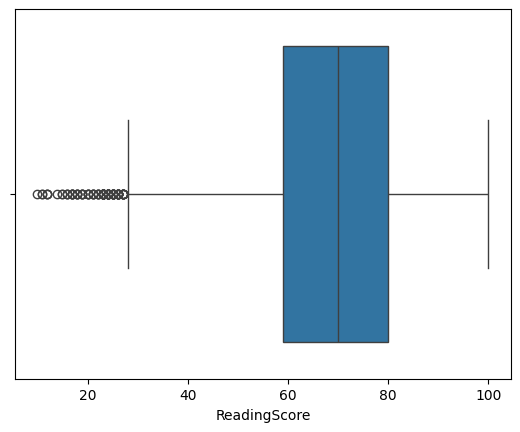

In [47]:
sns.boxplot(data= df , x = "ReadingScore")
plt.show()

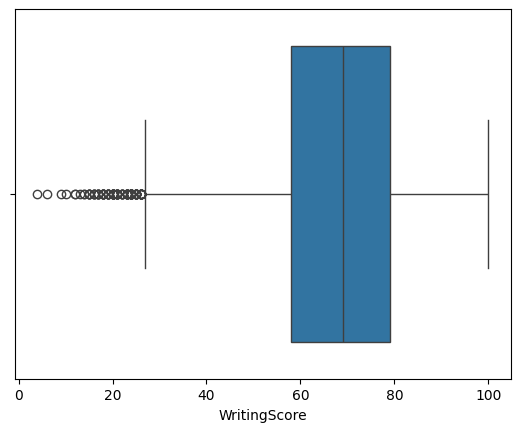

In [48]:
sns.boxplot(data= df , x = "WritingScore")
plt.show()

In [49]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


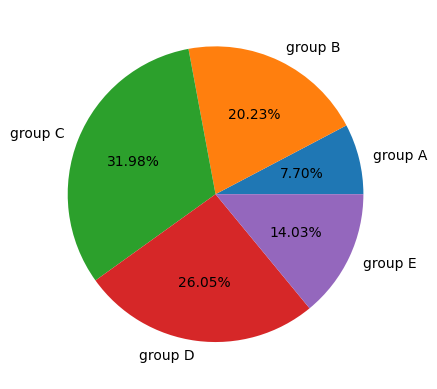

In [59]:
groupA=df.loc[(df["EthnicGroup"] == "group A")].count()
groupB=df.loc[(df["EthnicGroup"] == "group B")].count()
groupC=df.loc[(df["EthnicGroup"] == "group C")].count()
groupD=df.loc[(df["EthnicGroup"] == "group D")].count()
groupE=df.loc[(df["EthnicGroup"] == "group E")].count()

l= ["group A","group B","group C","group D","group E"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]

plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.show()

ParentEduc	LunchType	TestPrep 	WklyStudyHours PracticeSport  is five coloumn affects student marks so we take it all together and delet all